In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import two datesets 
colnames = ["LOAN_ID", "ORIG_CHN", "Seller.Name", "ORIG_RT", "ORIG_AMT", "ORIG_TRM", "ORIG_DTE","FRST_DTE", "OLTV", 
            "OCLTV", "NUM_BO", "DTI", "CSCORE_B", "FTHB_FLG", "PURPOSE", "PROP_TYP","NUM_UNIT", "OCC_STAT", 
            "STATE", "ZIP_3", "MI_PCT", "Product.Type", "CSCORE_C", "MI_TYPE", "RELOCATION_FLG"]
Data_A = pd.read_table('D:/1-Intern/Project_1/2018Q1/Acquisition_2018Q1.txt', 
                       sep = '|', header = None, names = colnames)
colnames_P = ["LOAN_ID", "Monthly.Rpt.Prd", "Servicer.Name", "LAST_RT", "LAST_UPB", "Loan.Age", "Months.To.Legal.Mat", 
              "Adj.Month.To.Mat", "Maturity.Date", "MSA", "Delq.Status", "MOD_FLAG", "Zero.Bal.Code", 
              "ZB_DTE", "LPI_DTE", "FCC_DTE","DISP_DT", "FCC_COST", "PP_COST", "AR_COST", "IE_COST", "TAX_COST", "NS_PROCS",
              "CE_PROCS", "RMW_PROCS", "O_PROCS", "NON_INT_UPB", "PRIN_FORG_UPB_FHFA", "REPCH_FLAG", "PRIN_FORG_UPB_OTH", "TRANSFER_FLG"]
Data_P = pd.read_table('D:/1-Intern/Project_1/2018Q1/Performance_2018Q1.txt', 
                       sep = '|', header = None, names = colnames_P,low_memory=False)

In [3]:
# Convert string into datetime
from datetime import datetime 
Data_P['Monthly.Rpt.Prd']= [datetime.strptime(x, '%m/%d/%Y') for x in Data_P.loc[:, 'Monthly.Rpt.Prd']]

In [8]:
Data_P['Delq.Status_D90']= Data_P['Delq.Status'].replace(['1','2','X'], '0')
Data_P['Delq.Status_D90'] = Data_P['Delq.Status_D90'].replace(['3','4','5','6','7','8','9','10','11','12',
                                                     '13','14','15','16','17','18','19','20','21','22'], '1')
Data_P['Delq.Status_D90'].value_counts()

0    9318346
1      13567
Name: Delq.Status_D90, dtype: int64

In [9]:
Data_P['Delq.Status_D90']=pd.to_numeric(Data_P['Delq.Status_D90'])

In [11]:
# Start to create a outcome variable in model
Flag_90 = Data_P['Delq.Status_D90'].groupby(Data_P['LOAN_ID']).sum()
Flag_90 = pd.DataFrame(Flag_90)
Flag_90 = Flag_90.reset_index()
Flag_90['Delq.Status_D90'].value_counts()

0.0     423359
1.0        636
2.0        374
4.0        337
3.0        283
5.0        265
6.0        206
8.0        162
7.0        151
9.0        104
11.0        75
10.0        74
12.0        45
13.0        40
14.0        25
16.0        20
15.0        20
18.0        13
17.0        10
20.0         4
19.0         3
Name: Delq.Status_D90, dtype: int64

In [12]:
Flag_90['Delq.Status_D90']= Flag_90.loc[:,'Delq.Status_D90'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 1)

In [13]:
Flag_90['Delq.Status_D90'].value_counts()

0.0    423359
1.0      2847
Name: Delq.Status_D90, dtype: int64

In [14]:
df = pd.merge(Data_A, Flag_90, on = 'LOAN_ID')

In [15]:
# Count missing values by column 
df.isnull().sum()

LOAN_ID                 0
ORIG_CHN                0
Seller.Name             0
ORIG_RT                 0
ORIG_AMT                0
ORIG_TRM                0
ORIG_DTE                0
FRST_DTE                0
OLTV                    0
OCLTV                   1
NUM_BO                  0
DTI                   111
CSCORE_B              336
FTHB_FLG                0
PURPOSE                 0
PROP_TYP                0
NUM_UNIT                0
OCC_STAT                0
STATE                   0
ZIP_3                   0
MI_PCT             312106
Product.Type            0
CSCORE_C           235423
MI_TYPE            312106
RELOCATION_FLG          0
Delq.Status_D90         0
dtype: int64

In [16]:
df['Credit_Score']=df[['CSCORE_B','CSCORE_C']].min(axis=1)

In [17]:
df['DTI']=df['DTI'].fillna(df['DTI'].median())

In [18]:
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].median())

In [19]:
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'Seller.Name', 'ORIG_RT', 'ORIG_AMT', 'ORIG_TRM',
       'ORIG_DTE', 'FRST_DTE', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B',
       'FTHB_FLG', 'PURPOSE', 'PROP_TYP', 'NUM_UNIT', 'OCC_STAT', 'STATE',
       'ZIP_3', 'MI_PCT', 'Product.Type', 'CSCORE_C', 'MI_TYPE',
       'RELOCATION_FLG', 'Delq.Status_D90', 'Credit_Score'],
      dtype='object')

In [21]:
# Explore Data 
## Numeric Variables
continous_cols = ['ORIG_RT', 'ORIG_AMT','OLTV','Credit_Score','NUM_UNIT']
X= df[continous_cols]
y= df['Delq.Status_D90']

In [23]:
#Logistic Regression model using sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [96]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
lr.predict_proba(X_test)

array([[0.99698477, 0.00301523],
       [0.99287685, 0.00712315],
       [0.99578826, 0.00421174],
       ...,
       [0.99594375, 0.00405625],
       [0.99661469, 0.00338531],
       [0.99392568, 0.00607432]])

In [131]:
# Make prediction on the training data
y_train_pred = lr.predict(X_train)
y_train_proba = lr.predict_proba(X_train)[:,1]

In [132]:
# get the probability of Delinquency=='0'
lr.predict_proba(X_train)[:,0]

array([0.99955403, 0.99656335, 0.99724652, ..., 0.96978676, 0.99312503,
       0.9935556 ])

In [133]:
# get the probability of Delinquency=='1'
lr.predict_proba(X_train)[:,1]

array([0.00044597, 0.00343665, 0.00275348, ..., 0.03021324, 0.00687497,
       0.0064444 ])

In [134]:
D90_Proba= pd.DataFrame(lr.predict_proba(X_train)[:,1])
D90_Proba

,0
0,0.000446
1,0.003437
2,0.002753
3,0.016420
4,0.002611
...,...
340959,0.002252
340960,0.002063
340961,0.030213
340962,0.006875


In [100]:
# Make predictions on test data
y_test_pred = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)[:,1]

In [101]:
lr.predict_proba(X_test)[:,1]

array([0.00301523, 0.00712315, 0.00421174, ..., 0.00405625, 0.00338531,
       0.00607432])

In [102]:
#Understanding the Estimated Coefficients
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,ORIG_RT,1.998193e-03
1,ORIG_AMT,-7.256898e-07
2,OLTV,4.000228e-02
3,Credit_Score,-1.102811e-02
4,NUM_UNIT,1.353736e-04


In [103]:
lr.intercept_

array([0.00018841])

In [104]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [105]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_proba, y_test, y_test_proba, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_proba),
                    accuracy_score(y_train, y_train_proba>threshold),
                    precision_score(y_train, y_train_proba>threshold),
                    recall_score(y_train, y_train_proba>threshold),
                    f1_score(y_train, y_train_proba>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_proba),
                    accuracy_score(y_test, y_test_proba>threshold),
                    precision_score(y_test, y_test_proba>threshold),
                    recall_score(y_test, y_test_proba>threshold),
                    f1_score(y_test, y_test_proba>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_proba, y_test, p_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)

    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhoda\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              train      test
metrics                      
AUC        0.766494  0.765555
Accuracy   0.993319  0.993325
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


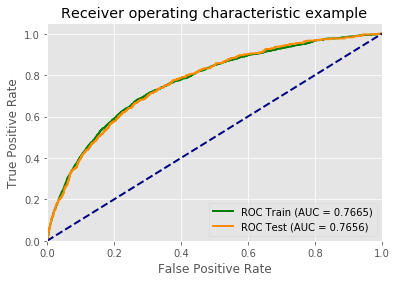

In [107]:
# print model results
get_performance_metrics(y_train, y_train_proba, y_test, y_test_proba)
plot_roc_curve(y_train, y_train_proba, y_test, y_test_proba)

Text(0.5, 257.44, 'Predicted label')

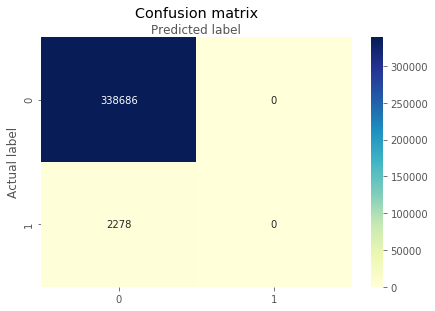

In [95]:
# Make prediction on the training data
y_train_pred = lr.predict(X_train)
y_train_proba= lr.predict_proba(X_train)

# Make predictions on test data
y_test_pred = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# # weighted Logistic Regression with Scikit_learn 
weights = {0:1.0, 1:100}
lr_1 = LogisticRegression(solver='lbfgs', class_weight=weights)
lr_1.fit(X_train, y_train)

In [145]:
# weighted Logistic Regression with Scikit_learn
weights = {0:1.0, 1:300} 
lr_1 = LogisticRegression(solver='lbfgs', class_weight=weights) 
lr_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 300}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
# Make prediction on the training data
y_train_pred_1 = lr_1.predict(X_train)
y_train_proba_1 = lr_1.predict_proba(X_train)[:,1]
# Make predictions on test data
y_test_pred_1 = lr_1.predict(X_test)
y_test_proba_1 = lr_1.predict_proba(X_test)[:,1]

In [147]:
lr_1.predict_proba(X_train)[:,1]

array([0.19056223, 0.51660152, 0.58329322, ..., 0.83746189, 0.64779836,
       0.66238909])

In [148]:
lr_1.predict_proba(X_test)[:,1]

array([0.53742253, 0.574654  , 0.68507447, ..., 0.61654483, 0.62449626,
       0.66019264])

In [149]:
#Understanding the Estimated Coefficients
coefficients_1 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lr_1.coef_))], axis = 1)
coefficients_1

,0,0
0,ORIG_RT,2.298590e-03
1,ORIG_AMT,-8.931879e-07
2,OLTV,4.068328e-02
3,Credit_Score,-3.231961e-03
4,NUM_UNIT,2.058571e-04


In [150]:
lr_1.intercept_

array([0.00025361])

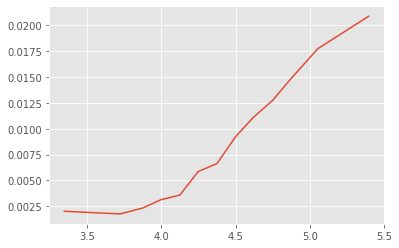

In [156]:
a=df.groupby(pd.qcut(df['ORIG_RT'],20,duplicates = 'drop'))[['ORIG_RT','Delq.Status_D90']].mean()
plt.plot(a['ORIG_RT'],a['Delq.Status_D90'])

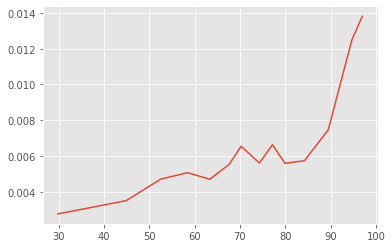

In [157]:
b=df.groupby(pd.qcut(df['OLTV'],20,duplicates = 'drop'))[['OLTV','Delq.Status_D90']].mean()
plt.plot(b['OLTV'],b['Delq.Status_D90'])

Text(0.5, 257.44, 'Predicted label')

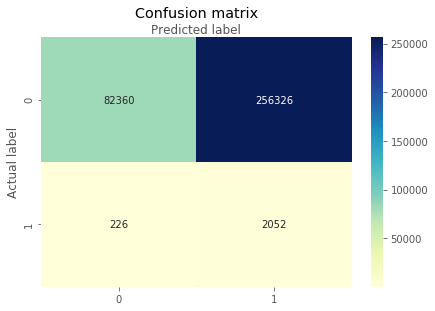

In [151]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_1)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [152]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_proba_1, y_test, y_test_proba_1, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_proba_1),
                    accuracy_score(y_train, y_train_proba_1>threshold),
                    precision_score(y_train, y_train_proba_1>threshold),
                    recall_score(y_train, y_train_proba_1>threshold),
                    f1_score(y_train, y_train_proba_1>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_proba_1),
                    accuracy_score(y_test, y_test_proba_1>threshold),
                    precision_score(y_test, y_test_proba_1>threshold),
                    recall_score(y_test, y_test_proba_1>threshold),
                    f1_score(y_test, y_test_proba_1>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)
    
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_proba_1, y_test, p_test_pred_1):
    roc_auc_train = roc_auc_score(y_train, y_train_proba_1)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba_1)

    roc_auc_test = roc_auc_score(y_test, y_test_proba_1)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba_1)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.692620  0.685753
Accuracy   0.445971  0.447326
Precision  0.009395  0.009258
Recall     0.784460  0.771529
f1-score   0.018568  0.018296


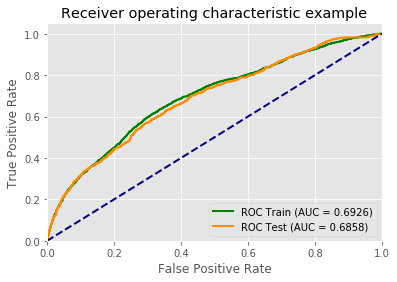

In [127]:
# print model results
get_performance_metrics(y_train, y_train_proba_1, y_test, y_test_proba_1)
plot_roc_curve(y_train, y_train_proba_1, y_test, y_test_proba_1)

In [139]:
## Logistic Regression in Python with SatsModels
import numpy as np
import statsmodels.api as sm

In [140]:
x = X
x = sm.add_constant(x)

In [141]:
model_1 = sm.Logit(y,x)
result = model_1.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.035804
         Iterations 10


In [142]:
result.params

const           5.018797e+00
ORIG_RT         5.351984e-01
ORIG_AMT       -6.323208e-07
OLTV            2.211718e-02
Credit_Score   -1.926947e-02
NUM_UNIT       -1.423085e-01
dtype: float64

In [143]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Delq.Status_D90   No. Observations:               426206
Model:                          Logit   Df Residuals:                   426200
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Jul 2020   Pseudo R-squ.:                  0.1075
Time:                        21:36:43   Log-Likelihood:                -15260.
converged:                       True   LL-Null:                       -17097.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.0188      0.415     12.079      0.000       4.204       5.833
ORIG_RT          0.5352      0.041     13.100      0.000       0.455       0.615
ORIG_AMT     -6.323e-07   1.65e-07     -3.822      0.000   -9.57e-07   -3.08e-07
OLTV             0.0221      0.001     15.942      0.000       0.019       0.025
Credit_Score    -0.0193      0.000    -43.133      0.000      -0.020      -0.018
NUM_UNIT        -0.1423      0.103     -1.376      0.169      -0.345       0.060
================================================================================
"""

In [144]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.107     
Dependent Variable: Delq.Status_D90  AIC:              30531.7367
Date:               2020-07-12 21:37 BIC:              30597.5128
No. Observations:   426206           Log-Likelihood:   -15260.   
Df Model:           5                LL-Null:          -17097.   
Df Residuals:       426200           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             5.0188   0.4155  12.0793 0.0000  4.2045  5.8331
ORIG_RT           0.5352   0.0409  13.1001 0.0000  0.4551  0.6153
ORIG_AMT         -0.0000   0.0000  -3.8217 0.0001 -0.0000 -0.0000
OLTV              0.0221   0.0014  15.9420 0.0000  0.0194  0.0248
Credit_Score     -0.0193   0.0004 -43.1334 0.0000 -0.0201 -0.0184
NUM_UNIT         -0.1423   0.1035  -1.3756 0.1690 -0.3451  0.0605
=================================================================

"""

In [154]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
# define model
model = LogisticRegression(solver='lbfgs')
# define grid
balance = [{0:1,1:100}, {0:1,1:150}, {0:1,1:200}, {0:1,1:250}, {0:1,1:300}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988943 using {'class_weight': {0: 1, 1: 100}}
0.988943 (0.006354) with: {'class_weight': {0: 1, 1: 100}}
0.988360 (0.006071) with: {'class_weight': {0: 1, 1: 150}}
0.987875 (0.005940) with: {'class_weight': {0: 1, 1: 200}}
0.987569 (0.005793) with: {'class_weight': {0: 1, 1: 250}}
0.987259 (0.005740) with: {'class_weight': {0: 1, 1: 300}}
